In [78]:
%run config.py

In [79]:
ds = {}
i = 0
for filename in os.listdir(r'R20m/'):
    if filename.endswith(".jp2"):
        i += 1
        ds["band_"+str(i)] = rasterio.open(os.path.join('R20m/', filename))
print(ds)

{'band_1': <open DatasetReader name='R20m/T34SFJ_20210806T092031_AOT_20m.jp2' mode='r'>, 'band_2': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B02_20m.jp2' mode='r'>, 'band_3': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B03_20m.jp2' mode='r'>, 'band_4': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B04_20m.jp2' mode='r'>, 'band_5': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B05_20m.jp2' mode='r'>, 'band_6': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B06_20m.jp2' mode='r'>, 'band_7': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B07_20m.jp2' mode='r'>, 'band_8': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B11_20m.jp2' mode='r'>, 'band_9': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B12_20m.jp2' mode='r'>, 'band_10': <open DatasetReader name='R20m/T34SFJ_20210806T092031_B8A_20m.jp2' mode='r'>, 'band_11': <open DatasetReader name='R20m/T34SFJ_20210806T092031_SCL_20m.jp2' mode='r'>, 'band_12': <open DatasetReade

In [80]:
for i, (band, raster) in enumerate(ds.items()):
    content = raster.read()
    print(band , ':' , content.min(), content.max() , ' minimum and maximum values respectively' )

band_1 : 101 334  minimum and maximum values respectively
band_2 : 1 19856  minimum and maximum values respectively
band_3 : 1 18414  minimum and maximum values respectively
band_4 : 0 17523  minimum and maximum values respectively
band_5 : 1 16985  minimum and maximum values respectively
band_6 : 0 16710  minimum and maximum values respectively
band_7 : 0 16523  minimum and maximum values respectively
band_8 : 19 15456  minimum and maximum values respectively
band_9 : 1 15251  minimum and maximum values respectively
band_10 : 0 16235  minimum and maximum values respectively
band_11 : 2 10  minimum and maximum values respectively
band_12 : 0 255  minimum and maximum values respectively
band_13 : 233 4697  minimum and maximum values respectively


In [81]:
l = []
for i, (band, raster) in enumerate(ds.items()):
    content = raster.read(1)
    l.append(content)
    
arr_st = np.stack(l)

print(arr_st.shape)

(13, 5490, 5490)


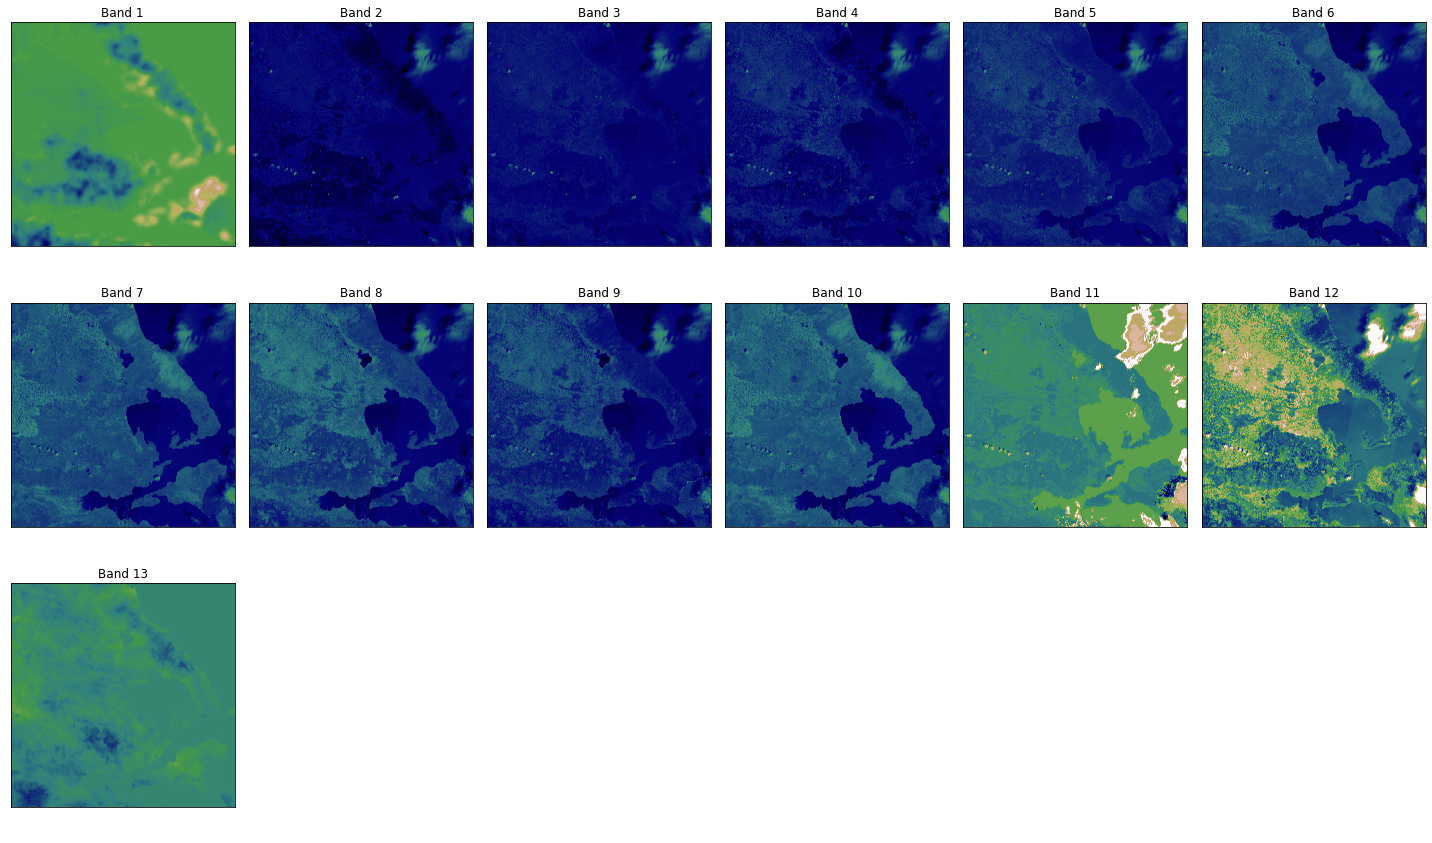

In [82]:
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = False)
plt.show()

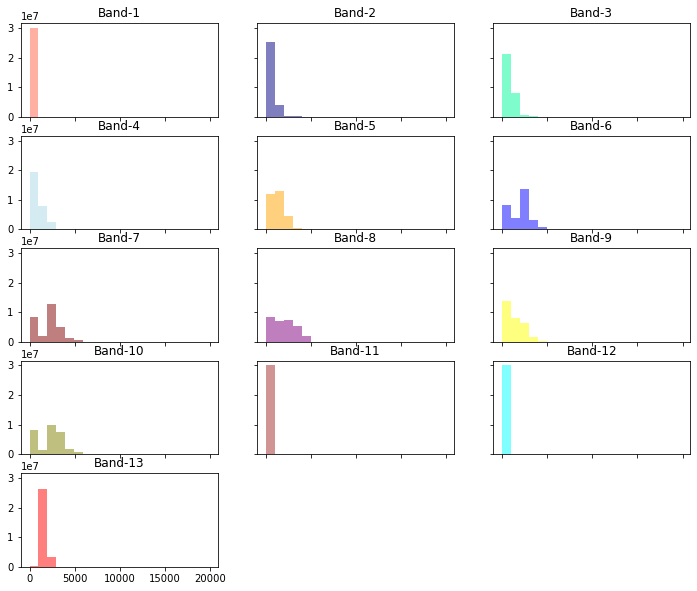

In [87]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan', 'red']

ep.hist(arr_st, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 14)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10))

plt.show()

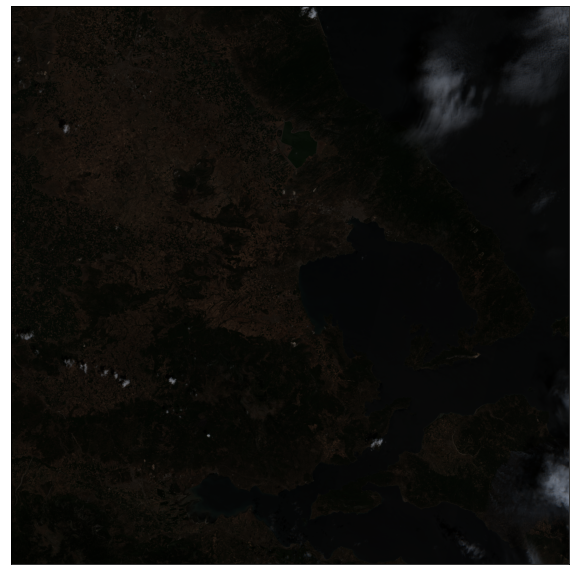

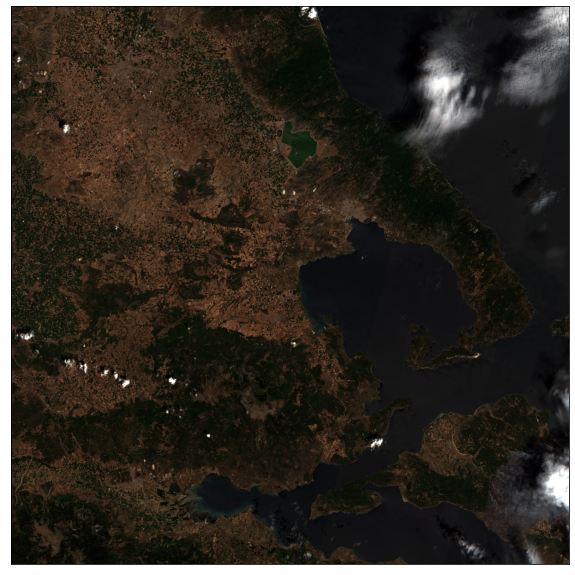

In [83]:
# RGB Composite Image

rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16))
plt.show()

# RGB Composite Image with Strech

ep.plot_rgb(arr_st,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

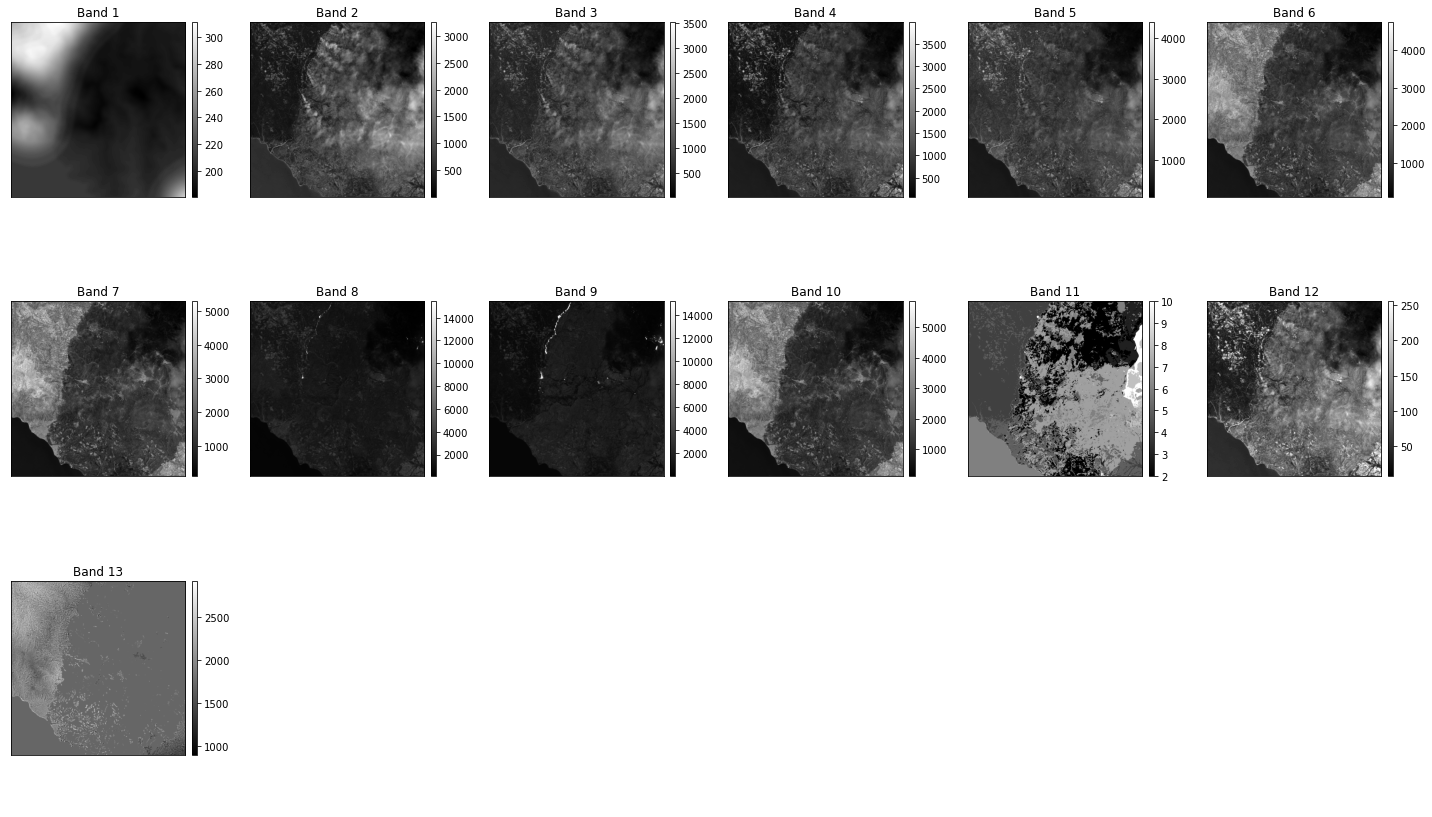

In [84]:
l_temp = []

for i, (band, raster) in enumerate(ds.items()):
    content = raster.read(1)
    temp = content[4500:5200, 4500:5200]
    l_temp.append(temp) 
    

arr_st_temp = np.stack(l_temp)


ep.plot_bands(arr_st_temp, 
              cmap = 'gray', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = True)
plt.show()


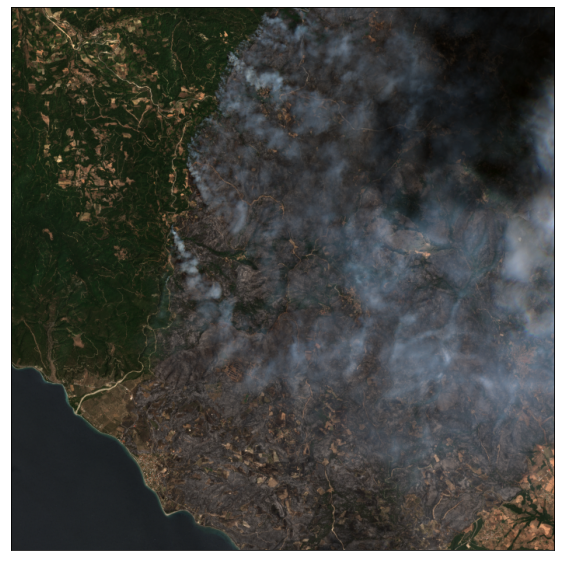

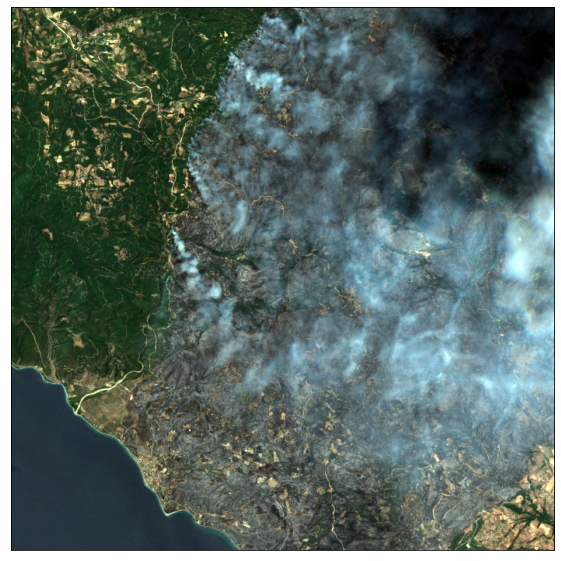

In [85]:
# RGB Composite Image

rgb = ep.plot_rgb(arr_st_temp, 
                  rgb=(3,2,1), 
                  figsize=(10, 10))
plt.show()

# RGB Composite Image with Strech

ep.plot_rgb(arr_st_temp,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 10))
plt.show()

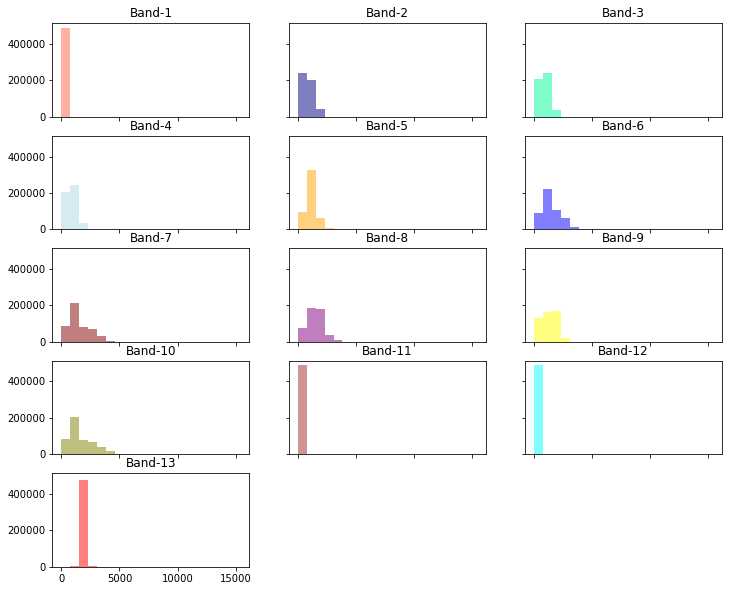

In [86]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan', 'red']

ep.hist(arr_st_temp, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 14)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10))

plt.show()